In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split,KFold,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,f1_score,make_scorer,accuracy_score



In [39]:
cars=pd.read_csv(r'C:\Users\HP\Desktop\car.csv')
cars.head()

,Bying,maintenance,doors,persons,Luggage boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bying         1728 non-null   object
 1   maintenance   1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   Luggage boot  1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [41]:
cars.isnull().sum()

Bying           0
maintenance     0
doors           0
persons         0
Luggage boot    0
safety          0
class           0
dtype: int64

In [42]:
cars.duplicated().sum()

0

In [43]:
cars.values

array([['vhigh', 'vhigh', '2', ..., 'small', 'low', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype=object)

In [44]:
from collections import Counter
Counter(cars['class'])

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

<AxesSubplot:title={'center':'Count (target)'}>

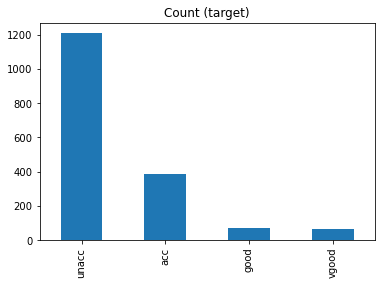

In [45]:
# According to count of values we can say that data is imbalanced lets visualize
cars['class'].value_counts().plot(kind='bar', title='Count (target)')

In [46]:
cars.columns

Index(['Bying', 'maintenance', 'doors', 'persons', 'Luggage boot', 'safety',
       'class'],
      dtype='object')

In [47]:
# looking for unique values of each column
for i in cars.columns:
    print(cars[i].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [48]:
# most of the values are ordinal.That's way we are using  Label Encoding to transform categorical variables to numbers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cars['safety']=le.fit_transform(cars['safety'])
cars['Bying']=le.fit_transform(cars['Bying'])
cars['maintenance']=le.fit_transform(cars['maintenance'])
cars['Luggage boot']=le.fit_transform(cars['Luggage boot'])
cars['class']=le.fit_transform(cars['class'])
cars['doors']=le.fit_transform(cars['doors'])
cars['persons']=le.fit_transform(cars['persons'])

cars.head()



,Bying,maintenance,doors,persons,Luggage boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


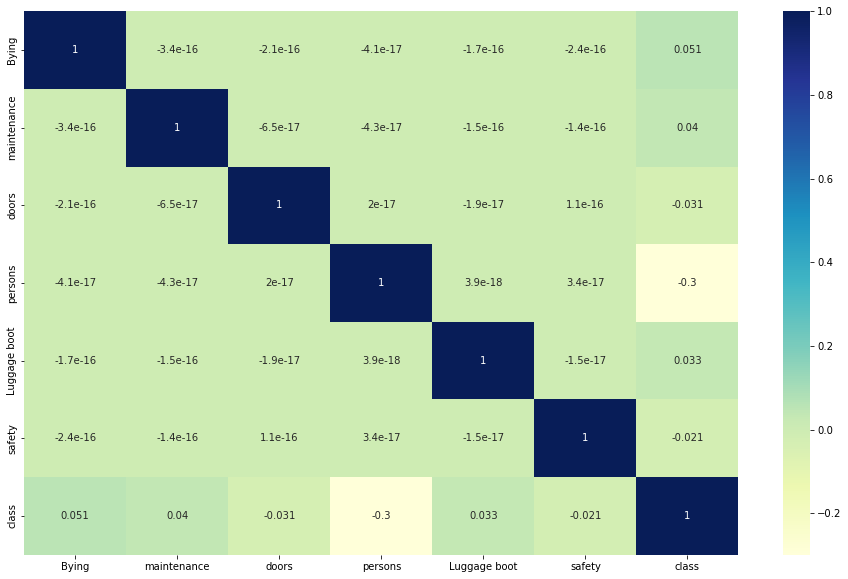

In [49]:
plt.figure(figsize = (16, 10))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [50]:
#There is not any positive correlation between features,only class has better (not enough) correlation with others

In [51]:
X=cars[cars.columns[:-1]]
y=cars['class']

In [52]:
X.head()

,Bying,maintenance,doors,persons,Luggage boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [53]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
# Random Forest Classification with train test split
rf=RandomForestClassifier(n_jobs=-1,random_state=51)


In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [57]:
predicted=rf.predict(X_test)

In [58]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       118
           1       0.81      0.89      0.85        19
           2       0.99      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.92      0.93      0.92       519
weighted avg       0.97      0.97      0.97       519



In [59]:
print('Accuracy score:',accuracy_score(y_test,predicted))

Accuracy score: 0.9730250481695568


In [70]:
#When we have imbalanced data accuracy score may not show real performance. There are some tecniques to handle imbalanced data
#I prefer to use f1 score as performance measure

In [71]:
f1=f1_score(y_test,predicted,average='macro')
f1

0.9245337130459484

In [ ]:
#Random Forest Classification with Cross Validation

In [62]:
rfc_cv_score = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
rfc_cv_score.mean()

0.853686651431644

In [63]:
rfc_cv_score_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1_macro')
rfc_cv_score_f1.mean()

0.7900779434286924

In [64]:
# I will use grid search (for the best hyperparameters ) and cross validation to improve the performance of our model

In [82]:
grid_par={'criterion':['gini','entropy'],
           'max_depth':[1,5,10,20,50],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [83]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=grid_par,cv=10,scoring='f1_macro')

In [84]:
grid.fit(X,y)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              random_state=51),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 20, 50],
                         'max_features': [2, 4, 6, 'auto'],
                         'max_leaf_nodes': [2, 3, None]},
             scoring='f1_macro')

In [85]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 4,
 'max_leaf_nodes': None}

In [86]:
grid.best_score_

0.8315808486534028

In [ ]:
# with the grid search f1 score is improved to 83% from 79